In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2             # ----> Importamos librerias  
                                                                    # ----> Scikit-learn, para Machine learning
                                                                    # ----> f_classif, compara promedios de los features con el 
                                                                    #       grupo seleccionado, en este caso Machine Failures
                                                                    # ----> SelectkBest, Ordena los resultados de f_classif de mayor
                                                                    #       a menor, y se queda con los mejores valores

In [31]:
file = '../data/clean/data_cls.csv'
data = pd.read_csv(file)
data.head()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1.0,298.1,308.6,1551.0,42.8,0.0,0.0
1,2.0,298.2,308.7,1408.0,46.3,3.0,0.0
2,3.0,298.1,308.5,1498.0,49.4,5.0,0.0
3,4.0,298.2,308.6,1433.0,39.5,7.0,0.0
4,5.0,298.2,308.7,1408.0,40.0,9.0,0.0


In [32]:
data.isnull().sum() # -------> Verificamos que no existan nulos en nuestro dataset limpio

UDI                        0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [33]:
data.groupby(['Machine failure']).count() # ----> Agrupamos en los valores unicos que tiene Machine Failure respecto a las
                                          # ----> respecto a las demas columnas

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Machine failure,,,,,,
0.0,9661,9661,9661,9661,9661,9661
1.0,339,339,339,339,339,339


In [34]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [35]:
(data.select_dtypes(include=[np.number]) < 0).any() # ----> Verificamos si hay valores negativos para usar CHI CUADRADO (chi2)

UDI                        False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
dtype: bool

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8428\1236436158.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


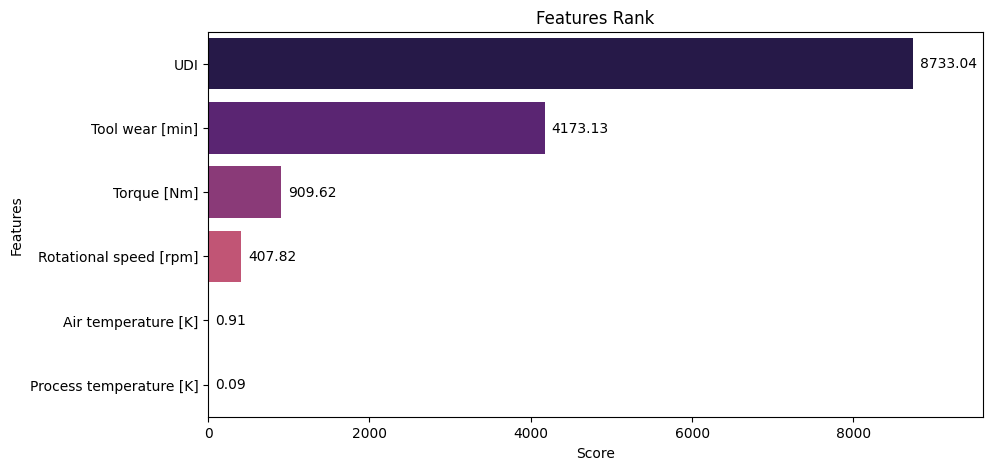

In [49]:
bf = SelectKBest(score_func=chi2, k='all')  # ----> clasifica las variables en base al test de CHI CUADRADO, se usaron todas las 
                                            #       las columnas
x = data.iloc[:, :-1]           # ----> ILOC hace cortes al dataset [filas, columnas] ----> filas ":" indica todoas las filas
y = data.iloc[:, -1]            #       y columnas ":-1" indica todas menos la última columna, mientras que solo "-1" solo la ultima
fit = bf.fit(x, y)              # ----> Aprende de los valores obtenidos del test de CHI CUADRADO

dscore = pd.DataFrame(fit.scores_)
dcols = pd.DataFrame(x.columns)

fscore = pd.concat([dcols, dscore], axis=1)
fscore.columns = ['Feature', 'Score']
fscore.sort_values(by=['Score'], ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x = fscore['Score'][0:20],
    y = fscore['Feature'][0:20],
    palette='magma',
)
for i in ax.containers:                         # ----> Iteramos para las etiquetas de las barras con sus respectivos scores
    ax.bar_label(i, fmt='%.2f', padding=5)      #       padding, espacio entre la etiqueta y la barra
plt.xlim(0, fscore['Score'].max() * 1.1)        # ----> Le anchamos un poco mas el eje x 0.1 mas para que la etiqueta este dentro
plt.title('Features Rank')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()